In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from time import ctime as convert
from datetime import datetime
from census import Census
import gmaps

# Census & gmaps API Keys
from api_keys import (g_key, census_key)
c = Census(census_key, year=2013)

# Configure gmaps
gmaps.configure(api_key = g_key)

In [2]:
# Read in the csv file for Covid Data and Create (2) dataframes - full and partial
covid_full_df = pd.read_csv('illinois_covid_data.csv')
covid_partial_df = covid_full_df.drop(["positiveScore","negativeScore", "negativeRegularScore", "commercialScore","grade","score","pending",
                          "inIcuCurrently" ,"inIcuCumulative","hospitalizedCurrently","onVentilatorCurrently","hospitalizedCumulative",
                          "onVentilatorCumulative","posNeg","hospitalized","fips", "recovered","dateModified","dateChecked","notes","hash","lastUpdateEt","checkTimeEt","total"], axis=1)

# Create a list of the Midwest states
mw_state_list = ['IL', 'ND','SD','NE','KS','MO','IA','MN','WI','MI','IN','OH']

# Slice the original dataframe using the list of Midwest states
mw_covid_df = covid_partial_df[covid_partial_df['state'].isin(mw_state_list)]

mw_covid_df = mw_covid_df.reset_index()
mw_covid_df["Mortality Rate (per 100)"] = np.round(100*mw_covid_df["death"]/mw_covid_df["positive"],2)
mw_covid_df["Positive Rate (per 100)"] = np.round(100*mw_covid_df["positive"]/mw_covid_df["totalTestResults"],2)

In [3]:
# Preview of full covid dataframe
covid_full_df.head()

state  positive  positiveScore  negativeScore  negativeRegularScore  \
0    AK       285            1.0            1.0                   1.0   
1    AL      3876            1.0            1.0                   0.0   
2    AR      1480            1.0            1.0                   1.0   
3    AZ      3806            1.0            1.0                   0.0   
4    CA     23338            1.0            1.0                   0.0   

   commercialScore grade  score  negative  pending  ...  death  hospitalized  \
0              1.0     A    4.0      8063      NaN  ...    9.0          32.0   
1              1.0     B    3.0     29241      NaN  ...  110.0         493.0   
2              1.0     A    4.0     19651      NaN  ...   30.0         130.0   
3              1.0     B    3.0     40290      NaN  ...  131.0           NaN   
4              1.0     B    3.0    178870  13200.0  ...  758.0           NaN   

    total  totalTestResults  posNeg  fips          dateModified  \
0    8348              8348    8348     2  2020-04-14T18:15:00Z   
1   33117             33117   33117     1  2020-04-14T04:00:00Z   
2   21131             21131   21131     5  2020-04-14T18:46:00Z   
3   44096             44096   44096     4  2020-04-14T04:00:00Z   
4  215408            202208  202208     6  2020-04-13T04:00:00Z   

            dateChecked                                              notes  \
0  2020-04-14T19:08:00Z  Please stop using the "total" field. Use "tota...   
1  2020-04-14T20:20:00Z  Please stop using the "total" field. Use "tota...   
2  2020-04-14T19:12:00Z  Please stop using the "total" field. Use "tota...   
3  2020-04-14T19:23:00Z  Please stop using the "total" field. Use "tota...   
4  2020-04-14T21:25:00Z  Please stop using the "total" field. Use "tota...   

                                       hash  
0  6164f73886cfabe73c7c9fad56709e2b57f5c334  
1  d517ca37c599d5eebf0a0d326dafe5e4ba6bbce2  
2  3a7c804cd01d3eaad04b7b28774f955dd2129c69  
3  095e72e11a4a87ffa7c0f77468bc4b449accb00d  
4  7a4e124e05f90a9fe7beead00aa1b97925289da6  

[5 rows x 29 columns]

In [4]:
# Preview of partial covid dataframe
covid_partial_df.head()

state  positive  negative  death  totalTestResults
0    AK       285      8063    9.0              8348
1    AL      3876     29241  110.0             33117
2    AR      1480     19651   30.0             21131
3    AZ      3806     40290  131.0             44096
4    CA     23338    178870  758.0            202208

In [5]:
# Preview of Midwest states dataframe
mw_covid_df.head()

index state  positive  negative   death  totalTestResults  \
0     12    IA      1899     16986    49.0             18885   
1     14    IL     23247     87369   868.0            110616   
2     15    IN      8527     37490   388.0             46017   
3     16    KS      1426     12721    69.0             14147   
4     22    MI     27001     59225  1768.0             86226   

   Mortality Rate (per 100)  Positive Rate (per 100)  
0                      2.58                    10.06  
1                      3.73                    21.02  
2                      4.55                    18.53  
3                      4.84                    10.08  
4                      6.55                    31.31

In [6]:
# Midwest reported cases
mw_covid_sum_df = mw_covid_df
mw_covid_sum_df.loc['total'] = mw_covid_sum_df.sum(numeric_only=True, axis =0)
total_positive = mw_covid_sum_df["positive"].sum()
total_negative = mw_covid_sum_df["negative"].sum()
total_death = mw_covid_sum_df["death"].sum()
mw_covid_sum_df

print(f"The total number of positive cases with COVID-19 in the Midwest states = {total_positive:,.0f}")
print(f"The total number of negative cases with COVID-19 in the Midwest states = {total_negative:,.0f}")
print(f"The total number of deaths due to COVID-19 in the Midwest states = {total_death:,.0f}")

# "{:,.2f}"
# ("{:.2%}".format)

# clb = plt.colorbar()
# clb.set_label("Median Income") -- use for scatter plot

The total number of positive cases with COVID-19 in the Midwest states = 162,778
The total number of negative cases with COVID-19 in the Midwest states = 845,432
The total number of deaths due to COVID-19 in the Midwest states = 7,762


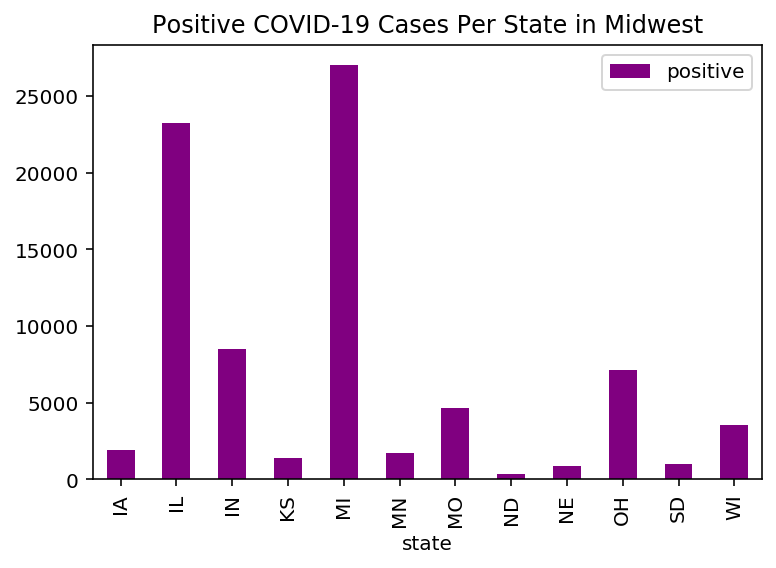

FileNotFoundError: [Errno 2] No such file or directory: '../state_county_data_images/positive_cases_per_state.png'

<Figure size 432x288 with 0 Axes>

In [8]:
# Plot Positive cases in Midwest
state_and_positive = mw_covid_df[["state","positive"]]
# Drop Nan values
state_and_positive=state_and_positive.dropna()
# Set the index to be "State" so they will be used as labels
state_and_positive = state_and_positive.set_index("state")

# Use DataFrame.plot() in order to create a bar chart of the data
state_and_positive.plot(kind="bar", color="purple")

# Set a title for the chart
plt.title("Positive COVID-19 Cases Per State in Midwest")

# Increase the quality and resolution of our charts so we can copy/paste or just
# directly save from here.
# See:
# https://ipython.org/ipython-doc/3/api/generated/IPython.display.html
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina', quality=300)

plt.show()
plt.savefig("../state_county_data_images/positive_cases_per_state.png")
plt.tight_layout()